In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from pandas.core.common import random_state
from sklearn.linear_model import LinearRegression
df_sal = pd.read_csv('Salary_Data.csv')
print(df_sal.head(10))

   YearsExperience   Salary
0              1.1  39343.0
1              1.3  46205.0
2              1.5  37731.0
3              2.0  43525.0
4              2.2  39891.0
5              2.9  56642.0
6              3.0  60150.0
7              3.2  54445.0
8              3.2  64445.0
9              3.7  57189.0


In [2]:
print(df_sal.describe())

       YearsExperience         Salary
count        30.000000      30.000000
mean          5.313333   76003.000000
std           2.837888   27414.429785
min           1.100000   37731.000000
25%           3.200000   56720.750000
50%           4.700000   65237.000000
75%           7.700000  100544.750000
max          10.500000  122391.000000


C:\Users\Omsai\AppData\Local\Temp\ipykernel_18800\1150752203.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_sal['Salary'])


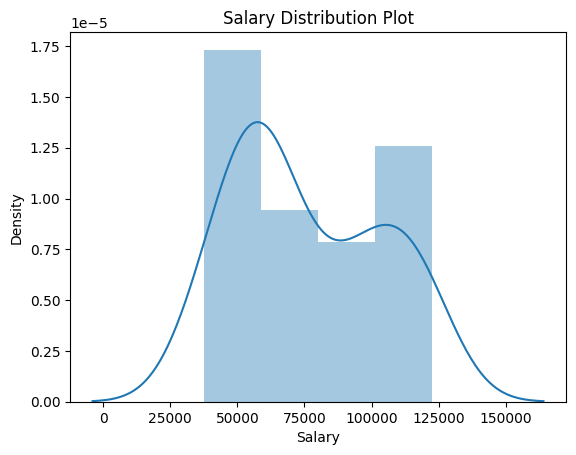

In [3]:
plt.title('Salary Distribution Plot')
sns.distplot(df_sal['Salary'])
plt.show()

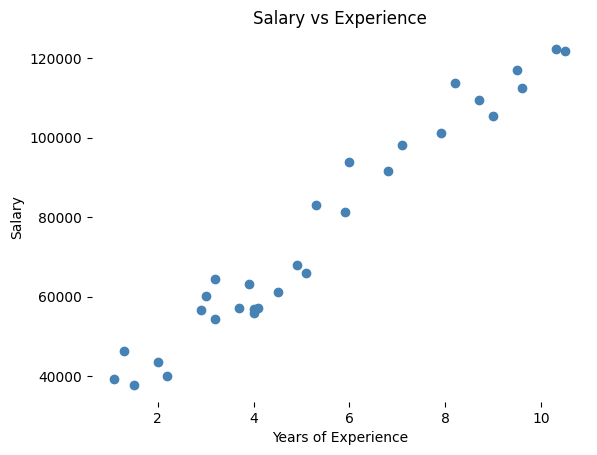

In [4]:
#relationship between experience and salary
plt.scatter(df_sal['YearsExperience'], df_sal['Salary'], color = 'steelblue')
plt.title('Salary vs Experience')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.box(False)
plt.show()

In [5]:
# Spliting of dependent and independent variables
X = df_sal.iloc[:, :1]
y = df_sal.iloc[:, 1:] 

# Splitting test/train
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [6]:
# Training the regression model
regressor = LinearRegression()  # Creating a LinearRegression object
regressor.fit(X_train, y_train) # Training

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


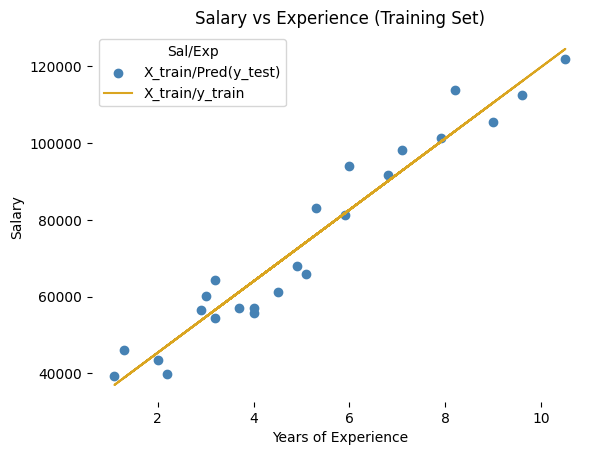

In [7]:
# Result of prediction
y_pred_test = regressor.predict(X_test)     # y_test
y_pred_train = regressor.predict(X_train)   # y_train

# Prediction on training data
plt.scatter(X_train, y_train, color = 'steelblue')
plt.plot(X_train, y_pred_train, color = 'goldenrod')
plt.title('Salary vs Experience (Training Set)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.legend(['X_train/Pred(y_test)', 'X_train/y_train'], title = 'Sal/Exp', loc='best', facecolor='white')
plt.box(False)
plt.show()

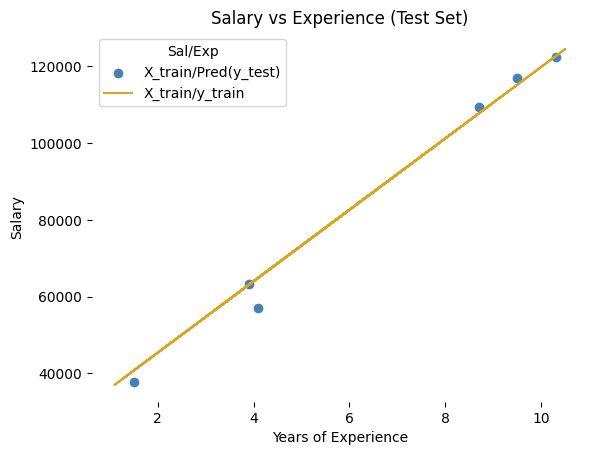

In [8]:
# Prediction on test data
plt.scatter(X_test, y_test, color = 'steelblue')
plt.plot(X_train, y_pred_train, color = 'goldenrod')
plt.title('Salary vs Experience (Test Set)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.legend(['X_train/Pred(y_test)', 'X_train/y_train'], title = 'Sal/Exp', loc='best', facecolor='white')
plt.box(False)
plt.show()

In [9]:
print(f'Coefficient: {regressor.coef_}')
print(f'Intercept: {regressor.intercept_}')

Coefficient: [[9312.57512673]]
Intercept: [26780.09915063]


In [10]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


mae = mean_absolute_error(y_test, y_pred_test) # Mean Absolute Error
mse = mean_squared_error(y_test, y_pred_test) # Mean Squared Error
rmse = np.sqrt(mse) # Root Mean 
r2 = r2_score(y_test, y_pred_test)

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R² Score: {r2}")


Mean Absolute Error (MAE): 2446.1723690465055
Mean Squared Error (MSE): 12823412.298126549
Root Mean Squared Error (RMSE): 3580.979237321343
R² Score: 0.988169515729126


In [11]:
print(f"MAE: {mae:.2f}")
print(f"MSE: {mse:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R² Score: {r2:.2f}")

MAE: 2446.17
MSE: 12823412.30
RMSE: 3580.98
R² Score: 0.99
